## AT3 Group 11 - Predicting the total spending amount for next month

**Name**: Wongwara Wijara

**Student id**: 14191732

**Email**: Wongwara.Wijara@student.uts.edu.au

**Subject**: 36106 Machine Learning Algorithms and Applications - Autumn 2023

**University**: University of Technology Sydney
***

## Experient A: Better decision making- Client Financial management:

**Goal for this experiment**

Help clients organise their budget by predicting their spending for the next month. This will help improve financial stability and overall pleasure.

## Data preperation - create whole dataset

The file that consumers submitted contained 133 files, one for client details and the other 132 for transactions, with two fields that were the identical in both categories, namely customer number(cc_num) and account number(acct_num).

In [21]:
import os
import pandas as pd

In [22]:
customer= pd.read_csv('/Users/lilywijara/Desktop/final/customers.csv', sep='|')

In [23]:
customer.shape

(1000, 15)

The client file contains 15 columns, including their social security number, name, gender, address with latitude and longitude, job, date of birth, and account number.

In [24]:
customer.head(3)

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479


### Ethical concern

These customer information contain personal information that can be used to identify an individual and potentially expose them to harm if it gets into the wrong hands. This raises various ethical concerns.

1. **Privacy and security**, because the SSN can be used to perpetrate identity theft or fraud. with the use of these information increases the danger of a data breach or other security issue, 
which could reveal clients' sensitive personal information and undermine their trust in our client.

2. **Data misappropriation**: There is a possibility that employees or other individuals having access to SSN data will misuse it for their own objectives, such as identity theft or financial fraud. 
This could have legal and reputational ramifications for our client.

3. **Informed consent**: Clients may not have been fully informed about the gathering and use of their SSN, and as a result, may not have given informed consent for its use. This may pose ethical problems about openness and protecting the autonomy of clients.

Furthermore, as data scientists, we should be cautious in how we utilise this data, although collecting SSNs is important for the project's objectives to detect the fuad, and this data will not be shared with other parties. 

Instead, and for this project I will look into other methods of identification or verification that do not involve SSNs.

The number of customers is 1000.

In [25]:
# read the path
file_path = '/Users/lilywijara/Desktop/final'

#list all the files from the path
file_list = os.listdir(file_path)

In [26]:
# file_list

## Merge the transaction files into one file

use For loop to merge 132 files.

In [27]:
# create an empty list to store the transaction dataframes
transactions_list = []

# loop through the file names.
for i in range(0, 131):
    file_name = f'/Users/lilywijara/Desktop/final/transactions_{i}.csv'
    try:
        # read in the transaction data for each file and append it to the list
        transactions_list.append(pd.read_csv(file_name, sep='|'))
    except FileNotFoundError:
        # if the file is not found, print an error message and continue to the next file
        print(f"File {file_name} not found, skipping...")

# merge all the transaction dataframes into a single master transactions dataset
transactions_master = pd.concat(transactions_list, axis=0, ignore_index=True)

In [28]:
# print the merged dataset
transactions_master.head(3)

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327


The total number of transactions are 4,260,904.

In [29]:
# merge the two datasets on the 'cc_num' and 'acct_num' columns
df = pd.merge(transactions_master, customer, on=['cc_num', 'acct_num'], how='left')

Merge the transactions dataset and customer dataset with columns customer number and account number and keep it in DataFrame called df.

In [30]:
# df.to_csv('df.csv')

This function creates the df.CSV file so that our team has the same file for each use case.

## Check the final dataset

The total number of transactions are 4,260,904 and contain 23 columns.

In [31]:
df.shape

(4260904, 23)

In [32]:
df.head(3)

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,gender,street,city,state,zip,lat,long,city_pop,job,dob
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,...,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,...,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,...,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03


## Predicting their total spending amount for the next month (regression or classification)

As a data scientist working for a bank with data provided by the bank that they have collected transactional data from their customers for the last three years. Our first task is to helping customers to better budget their finances by predicting their total spending amount for the next month.

There are 1000 customers with the transaction data from December 2018 – December 2022 There are 4,260,904 rows and 23 variables in the dataset. 

Import the important library for this project:

In [33]:
import pandas as pd
import numpy as np

## for visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# for datetime column
from datetime import datetime, date

# avoid the warning display
import warnings
warnings.filterwarnings("ignore")

### The issues with Missing values

Before start the experiment, we have to check if there any missing value in our data.

In [34]:
# Find columns that contain missing values
cols_with_missing = df.columns[df.isnull().any()]

# If there are any columns with missing values, print their names
if len(cols_with_missing) > 0:
    print('The following columns contain missing values:')
    for col in cols_with_missing:
        print(col)
else:
    print('There are no missing values in any columns.')

There are no missing values in any columns.


**However**, There are the transactions that consider is fraud in our data with 0.1181% of fraud which is 5034 data from 4,255,870 transactions.

In [35]:
counts = df.value_counts(["is_fraud"])
percent = df.value_counts(["is_fraud"],normalize=True).mul(100).round(4).astype(str) + '%'
pd.concat([counts,percent], axis=1, keys=['count', 'percent'])

,count,percent
is_fraud,,
0,4255870,99.8819%
1,5034,0.1181%


In [36]:
fig = px.pie(df, values=df.value_counts(["is_fraud"]), names=percent,
             title='Pie chart show the Percent of is_fraud')
fig.show()

**However,** This problem will not be addressed in this experiment because it will be addressed in experiment B by one of our team members. 

In [37]:
# Select only the rows where is_fraud is 0
# df = df[df['is_fraud'] == 0]

So, in order to provide accurate results for our client's following month transaction and. to gain a better understanding of our consumers' behaviour,I will only employ transactions that are considered normal (not fraudulent).

## Feature Engineering

In this step, I do five feature engineering tasks: full name, unix time conversion to date time, and age.

## 1. Full name

We can use the full name to identify the customer, so we don't have to use the ssn and with full name, this make it easliy for us to understand their transaction behavior.

In [38]:
cols = ['first', 'last']
df['full_name'] = df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [39]:
len(df['full_name'].unique())

974

In [40]:
df.duplicated().sum()

0

## 2. Date time

I use the unit='s' parameter when calling pd.to_datetime to specify that the input unix_time column is in seconds. This allows pandas to convert the Unix time values to a datetime format that can be easily manipulated and analyzed.

In [41]:
len(df['unix_time'].unique())

4114752

In [42]:
# convert the unix_time column to a datetime object
df['date_time'] = pd.to_datetime(df['unix_time'], unit='s')

In [43]:
# use the .dt accessor on the 'date_time' column
df['year'] = df['date_time'].dt.year

df['month'] = df['date_time'].dt.month

## 3. Age

In [44]:
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df['age'] = df['dob'].apply(age)

## Dataset for this Experiment

In [45]:
# Select only not fraud
df_not_fraud = df[df['is_fraud'] == 0]

# Select only useful column for the experiment A
df_not_fraud = df.drop(['cc_num', 'acct_num', 'trans_num', 'unix_time','is_fraud','merchant', 'merch_lat', 'merch_long', 'ssn', 'first',
       'last', 'street', 'city', 'state','lat', 'long', 'city_pop'],axis=1)

In [46]:
df_not_fraud.columns

Index(['category', 'amt', 'gender', 'zip', 'job', 'dob', 'full_name',
       'date_time', 'year', 'month', 'age'],
      dtype='object')

In [47]:
df_not_fraud.describe()

,amt,zip,year,month,age
count,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06
mean,6.898790e+01,5.190384e+04,2.020789e+03,7.159515e+00,4.491606e+01
std,1.618467e+02,2.996720e+04,1.166808e+00,3.418899e+00,1.766019e+01
min,1.000000e+00,1.571000e+03,2.018000e+03,1.000000e+00,1.500000e+01
25%,9.100000e+00,2.750500e+04,2.020000e+03,4.000000e+00,3.000000e+01
50%,4.449000e+01,4.920200e+04,2.021000e+03,7.000000e+00,4.300000e+01
75%,8.158000e+01,7.870400e+04,2.022000e+03,1.000000e+01,5.600000e+01
max,4.130053e+04,9.970500e+04,2.022000e+03,1.200000e+01,9.500000e+01


In [48]:
df_not_fraud.head(2)

,category,amt,gender,zip,job,dob,full_name,date_time,year,month,age
0,gas_transport,69.12,M,19002,Accounting technician,1959-10-03,Jonathan Johnson,2019-05-24 17:39:10,2019,5,63
1,grocery_pos,68.11,M,19002,Accounting technician,1959-10-03,Jonathan Johnson,2019-09-25 15:31:59,2019,9,63


## Check the total amount for each month/year

In [49]:
# Group by year and month and calculate the total amount for each group
monthly_df = df_not_fraud.groupby(['year', 'month'])['amt'].sum().reset_index()

# rename the columns for clarity
monthly_df.columns = ['year','month','total_spending']

# Plot the line graph
fig = px.line(monthly_df, x='month', y='total_spending', color='year', title='Total Monthly Amount')
fig.show()

As shown in the graph above, December has the highest total amount of transactions, indicating that seasonal patterns indicate increased economic activity during the holiday season with year-end financials and high promotions and discounts on December such as Black Friday, Cyber Monday, or Christmas sales. 

In [50]:
# group the data by customer, year, and month and sum the amounts
monthly_spending = df.groupby(['full_name','year','month'])['amt'].sum().reset_index()

# rename the columns for clarity
monthly_spending.columns = ['full_name','year','month', 'total_spending']

In [51]:
monthly_spending.shape

(43533, 4)

There are 43,533 rows for our monthly spending data 

In [52]:
cols = ['first', 'last']
customer['full_name'] = customer[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [78]:
# merge the two datasets on the 'cc_num' and 'acct_num' columns
df_monthly = pd.merge(monthly_spending, customer, on=['full_name'], how='left')

In [79]:
# Create new binary variables for each category using one-hot encoding
# df_monthly = pd.get_dummies(df_monthly, columns=['gender'], prefix=['is'])

In [80]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

In [81]:
df_monthly['age'] = df_monthly['dob'].apply(age)
df_monthly['job'] = le.fit_transform(df_monthly['job'])
df_monthly['zip'] = le.fit_transform(df_monthly['zip'])
df_monthly['gender'] = le.fit_transform(df_monthly['gender'])

In [82]:
df_monthly = df_monthly.drop(['ssn', 'cc_num',
       'first', 'last', 'street', 'city', 'state','lat', 'long', 'acct_num','city_pop','dob'],axis=1)

In [83]:
df_monthly.head(5)

,full_name,year,month,total_spending,gender,zip,job,age
0,Aaron Bean,2019,1,2268.28,1,539,411,65
1,Aaron Bean,2019,2,2568.58,1,539,411,65
2,Aaron Bean,2019,3,2678.04,1,539,411,65
3,Aaron Bean,2019,4,7831.23,1,539,411,65
4,Aaron Bean,2019,5,4737.32,1,539,411,65


In [84]:
df_monthly.columns

Index(['full_name', 'year', 'month', 'total_spending', 'gender', 'zip', 'job',
       'age'],
      dtype='object')

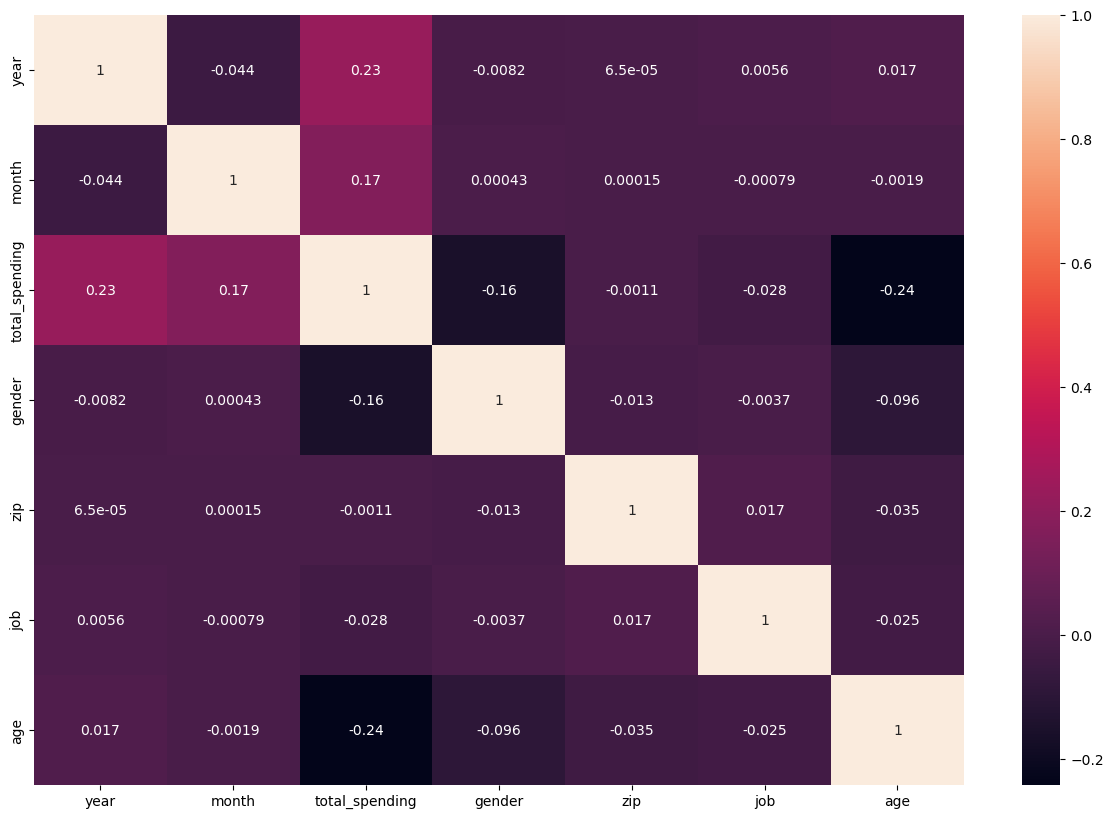

In [85]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_monthly.corr(), annot = True, ax=ax)
plt.show()

In [86]:
df_monthly = df_monthly.drop(['zip','job'],axis=1)

In [87]:
# Create 'This Month Total Spending' column
df_monthly['current_month_spending'] = df_monthly['total_spending']

# Shift the 'total_spending' values by 1 to get 'Next Month Spending'
df_monthly['next_month_spending'] = df_monthly['total_spending'].shift(-1)

# Drop the last row which contains NaN for 'Next Month Spending'
df_monthly.dropna(subset=['next_month_spending'], inplace=True)

In [88]:
# df_monthly = df_monthly.drop(['total_spending'],axis=1)

In [77]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Select relevant features and target variable
features = ['year','month', 'current_month_spending', 'age', 'gender']
target = 'next_month_spending'
data = df_monthly[features + [target]].copy()

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Train the regression model
X_train = train_data[features]
y_train = train_data[target]
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Evaluate the model
X_test = test_data[features]
y_test = test_data[target]
y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Make predictions
new_customer = pd.DataFrame([[2023, 6, 500, 35, 0]], columns=features)  # Example input for a new customer
prediction = regression_model.predict(new_customer)
print('Predicted Next Transaction Amount:', prediction[0])


Mean Squared Error: 18372612.514266662
Predicted Next Transaction Amount: 4444.153162342438


## The issues with Outlier in our target 'Amount'

Take a look at the "total_spending" for inspection. I'll create a basic density plot, which is one of the most effective visualisations for finding outliers.

<AxesSubplot:xlabel='total_spending', ylabel='Density'>

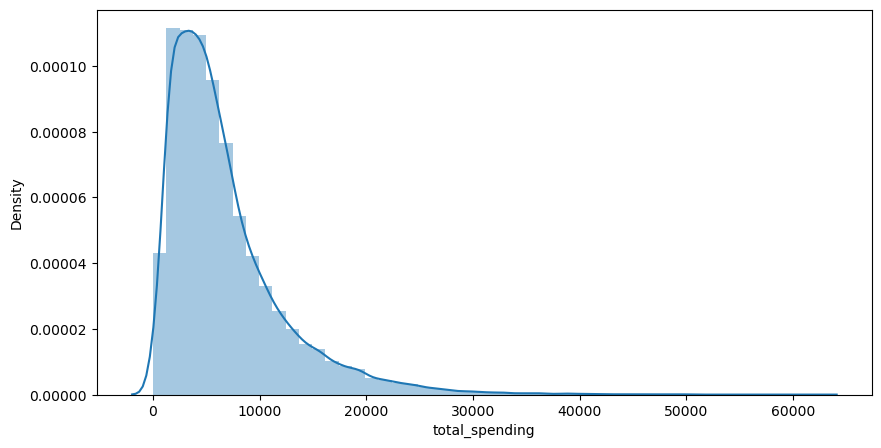

In [52]:
plt.figure(figsize = (10,5))
sns.distplot(df_monthly['total_spending'])

In [89]:
def out_iqr(df_monthly, column):
    global lower,upper
    q25, q75 = np.quantile(df_monthly[column], 0.25), np.quantile(df_monthly[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df_monthly[df_monthly[column] > upper]
    df2 = df_monthly[df_monthly[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [90]:
out_iqr(df_monthly ,'total_spending')

The IQR is 5740.14
The lower bound value is -5592.250000000001
The upper bound value is 17368.31
Total number of outliers are 2412


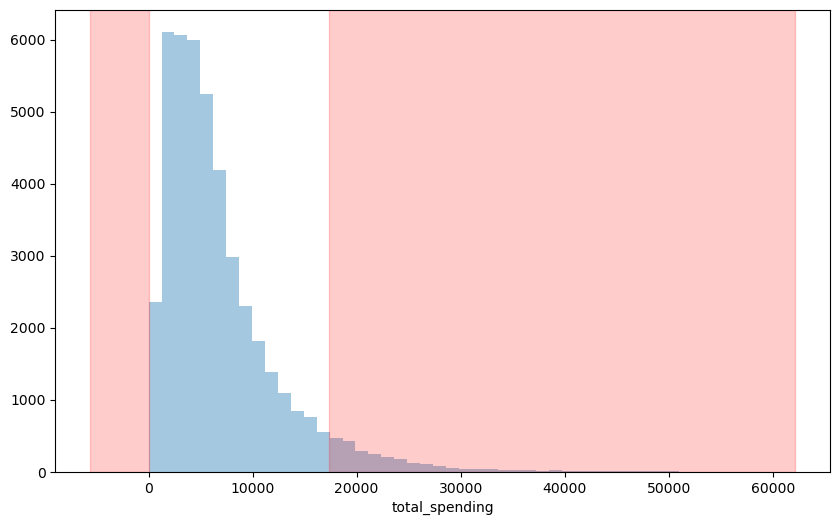

In [91]:
plt.figure(figsize = (10,6))
sns.distplot(df_monthly.total_spending, kde=False)
plt.axvspan(xmin = lower,xmax= df_monthly.total_spending.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_monthly.total_spending.max(),alpha=0.2, color='red')

Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

## Create the new dataframe without outlier

In [92]:
df_new = df_monthly[(df_monthly.total_spending < upper) | (df_monthly.total_spending > lower)]

In [93]:
df_new.head(5)

,full_name,year,month,total_spending,gender,age,current_month_spending,next_month_spending
0,Aaron Bean,2019,1,2268.28,1,65,2268.28,2568.58
1,Aaron Bean,2019,2,2568.58,1,65,2568.58,2678.04
2,Aaron Bean,2019,3,2678.04,1,65,2678.04,7831.23
3,Aaron Bean,2019,4,7831.23,1,65,7831.23,4737.32
4,Aaron Bean,2019,5,4737.32,1,65,4737.32,4435.25


In [94]:
df_new.shape

(44069, 8)

In [95]:
df_new.isna().sum()

full_name                 0
year                      0
month                     0
total_spending            0
gender                    0
age                       0
current_month_spending    0
next_month_spending       0
dtype: int64

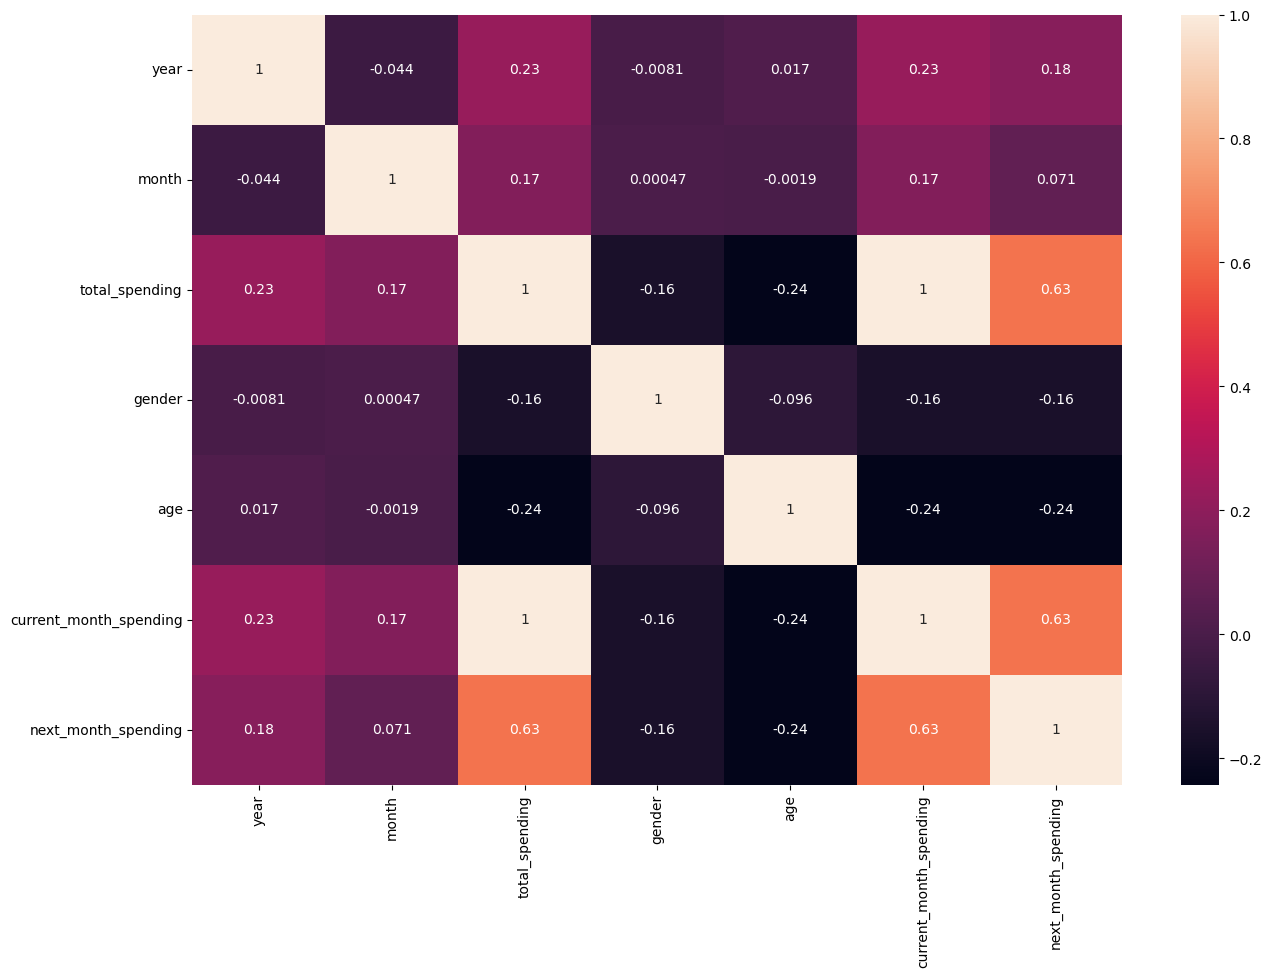

In [96]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_new.corr(), annot = True, ax=ax)
plt.show()

In [97]:
df_new = df_new.drop(['full_name'],axis=1)

In [98]:
# Create 'This Month Total Spending' column
df_new['current_month_spending'] = df_new['total_spending']

# Shift the 'total_spending' values by 1 to get 'Next Month Spending'
df_new['next_month_spending'] = df_new['total_spending'].shift(-1)

# Drop the last row which contains NaN for 'Next Month Spending'
df_new.dropna(subset=['next_month_spending'], inplace=True)

In [99]:
df_new.head(4)

,year,month,total_spending,gender,age,current_month_spending,next_month_spending
0,2019,1,2268.28,1,65,2268.28,2568.58
1,2019,2,2568.58,1,65,2568.58,2678.04
2,2019,3,2678.04,1,65,2678.04,7831.23
3,2019,4,7831.23,1,65,7831.23,4737.32


<AxesSubplot:xlabel='next_month_spending', ylabel='Density'>

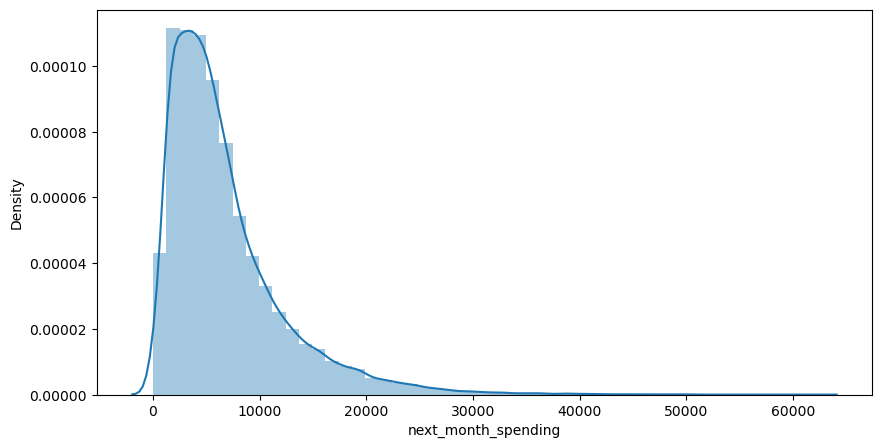

In [100]:
plt.figure(figsize = (10,5))
sns.distplot(df_new['next_month_spending'])

In [101]:
df_new = df_new.drop(['total_spending'],axis=1)

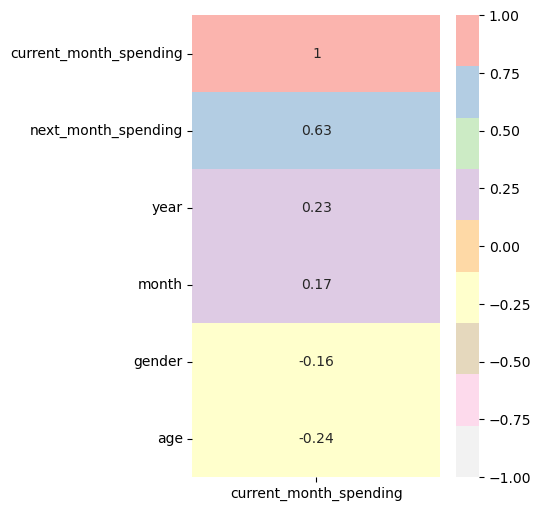

In [102]:
plt.figure(figsize=(4, 6))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df_new.corr()[['current_month_spending']].sort_values(by='current_month_spending', ascending=False), 
            vmin=-1, vmax=1, annot=True, cmap='Pastel1_r')
plt.show()

In [103]:
df_new_check_month = df_new.copy()

In [104]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Select relevant features and target variable
features = ['year','month', 'current_month_spending', 'age', 'gender']
target = 'next_month_spending'
data = df_monthly[features + [target]].copy()

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Train the regression model
X_train = train_data[features]
y_train = train_data[target]
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Evaluate the model
X_test = test_data[features]
y_test = test_data[target]
y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Make predictions
new_customer = pd.DataFrame([[2023, 6, 500, 35, 0]], columns=features)  # Example input for a new customer
prediction = regression_model.predict(new_customer)
print('Predicted Next Transaction Amount:', prediction[0])

Mean Squared Error: 18372612.514266662
Predicted Next Transaction Amount: 4444.153162342438


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Separate the features (X) and the target (y)
y = df_new.pop('next_month_spending')  # Use the last month as the target
X = df_new

In [105]:
### Assess Baseline Model
y_mean_model = y_train.mean()
y_base_model = np.full(y_train.shape, y_mean_model)

In [113]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 

print(f"mse for baseline model: {round(mean_squared_error(y_train, y_base_model),2)}")
print(f"mae for baseline model: {round(mean_absolute_error (y_train, y_base_model),2)}")

mse for baseline model: 30467352.71
mae for baseline model: 3988.85


In [114]:
def calculate_mape(y, y_pred):

    y = np.array(y)
    y_pred = np.array(y_pred)
    
    mape = np.mean(np.abs((y - y_pred) / y)) * 100
    
    return mape

mape = calculate_mape(y_train, y_base_model)

print("MAPE:", round(mape,5))

MAPE: 493.52211


A MAPE (Mean Absolute Percentage Error) value of 493.52% indicates that, on average, this model's predictions are 493.52% off from the true values.

In [118]:
# Linear regression model
from sklearn.linear_model import LinearRegression

# Decsion Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#KNN regression
from sklearn.neighbors import KNeighborsRegressor

In [119]:
reg = LinearRegression()   
reg.fit(X_train, y_train)
reg.intercept_,reg.coef_

# Model evaluation for training set
y_train_preds_reg = reg.predict(X_train)
print(f"mse scores on the training set: {round(mean_squared_error(y_train, y_train_preds_reg), 3)}")
print(f"mae scores on the training set: {round(mean_absolute_error(y_train, y_train_preds_reg), 3)}")
print(f"R-square scores on the training set: {round(r2_score(y_train, y_train_preds_reg), 4)}")
print(f"____________________")

y_test_preds_reg = reg.predict(X_test)
print(f"mse scores on the test set: {round(mean_squared_error(y_test, y_test_preds_reg ),3)}")
print(f"mae scores on the test set: {round(mean_absolute_error(y_test, y_test_preds_reg ),3)}")
print(f"R-square scores on the test set: {round(r2_score(y_test, y_test_preds_reg  ),4)}")

mse scores on the training set: 17673959.02
mae scores on the training set: 2693.315
R-square scores on the training set: 0.4199
____________________
mse scores on the test set: 18372612.514
mae scores on the test set: 2727.891
R-square scores on the test set: 0.415


In [120]:
mape_reg = calculate_mape(y_test, y_test_preds_reg)

print("MAPE:", round(mape_reg,5))

MAPE: 624.75237


In [141]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

# Model evaluation for training set
y_train_preds_tree = tree.predict(X_train)
print(f"mse scores on the training set: {round(mean_squared_error(y_train, y_train_preds_tree), 3)}")
print(f"mae scores on the training set: {round(mean_absolute_error(y_train, y_train_preds_tree), 3)}")
print(f"R-square scores on the training set: {round(r2_score(y_train, y_train_preds_tree), 4)}")
print(f"____________________")

y_test_preds_tree = tree.predict(X_test)
print(f"mse scores on the test set: {round(mean_squared_error(y_test, y_test_preds_tree),3)}")
print(f"mae scores on the test set: {round(mean_absolute_error(y_test, y_test_preds_tree),3)}")
print(f"R-square scores on the test set: {round(r2_score(y_test, y_test_preds_tree),4)}")

# Make predictions
new_customer = pd.DataFrame([[2023, 6, 500, 35, 0]], columns=features)  # Example input for a new customer
prediction = tree.predict(new_customer)
print('Predicted Next Transaction Amount:', round(prediction[0],2))

mse scores on the training set: 8123402.114
mae scores on the training set: 1900.069
R-square scores on the training set: 0.7334
____________________
mse scores on the test set: 9107776.997
mae scores on the test set: 1961.821
R-square scores on the test set: 0.71
Predicted Next Transaction Amount: 2012.03


In [122]:
mape_tree = calculate_mape(y_test, y_test_preds_tree)

print("MAPE:", round(mape_tree,5))

MAPE: 113.44132


In [140]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# Model evaluation for training set
y_train_preds_forest = forest.predict(X_train)
print(f"mse scores on the training set: {round(mean_squared_error(y_train, y_train_preds_forest), 3)}")
print(f"mae scores on the training set: {round(mean_absolute_error(y_train, y_train_preds_forest), 3)}")
print(f"R-square scores on the training set: {round(r2_score(y_train, y_train_preds_forest), 4)}")
print(f"____________________")

y_test_preds_forest = forest.predict(X_test)
print(f"mse scores on the test set: {round(mean_squared_error(y_test, y_test_preds_forest),3)}")
print(f"mae scores on the test set: {round(mean_absolute_error(y_test, y_test_preds_forest),3)}")
print(f"R-square scores on the test set: {round(r2_score(y_test, y_test_preds_forest),4)}")

# Make predictions
new_customer = pd.DataFrame([[2023, 6, 500, 35, 0]], columns=features)  # Example input for a new customer
prediction = forest.predict(new_customer)
print('Predicted Next Transaction Amount:', round(prediction[0],2))

mse scores on the training set: 980142.429
mae scores on the training set: 647.961
R-square scores on the training set: 0.9678
____________________
mse scores on the test set: 7477201.807
mae scores on the test set: 1765.913
R-square scores on the test set: 0.7619
Predicted Next Transaction Amount: 1943.11


In [124]:
mape_forest = calculate_mape(y_test, y_test_preds_forest)

print("MAPE:", round(mape_forest,5))

MAPE: 119.85402


In [125]:
knn_default_reg = KNeighborsRegressor()
knn_default_reg.fit(X_train, y_train)

y_train_preds_knn = knn_default_reg.predict(X_train)
print(f"mse scores on the training set: {round(mean_squared_error(y_train, y_train_preds_knn), 3)}")
print(f"mae scores on the training set: {round(mean_absolute_error(y_train, y_train_preds_knn), 3)}")
print(f"R-square scores on the training set: {round(r2_score(y_train, y_train_preds_knn), 4)}")
print(f"____________________")

y_test_preds_knn = knn_default_reg.predict(X_test)
print(f"mse scores on the test set: {round(mean_squared_error(y_test, y_test_preds_knn),3)}")
print(f"mae scores on the test set: {round(mean_absolute_error(y_test, y_test_preds_knn),3)}")
print(f"R-square scores on the test set: {round(r2_score(y_test, y_test_preds_knn),4)}")

mse scores on the training set: 11983790.788
mae scores on the training set: 2208.964
R-square scores on the training set: 0.6067
____________________
mse scores on the test set: 18633568.631
mae scores on the test set: 2736.5
R-square scores on the test set: 0.4067


In [126]:
mape_knn = calculate_mape(y_test, y_test_preds_knn)

print("MAPE:", round(mape_knn,5))

MAPE: 477.50275


In [130]:
# MSE score
mse_train_reg = round(mean_squared_error(y_train, y_train_preds_reg),2)
mse_test_reg = round(mean_squared_error(y_test, y_test_preds_reg),2)
diff_reg = mse_test_reg - mse_train_reg
mae_train_reg = round(mean_absolute_error(y_train, y_train_preds_reg),2)
mae_test_reg = round(mean_absolute_error(y_test, y_test_preds_reg),2)
r2_train_reg = round(r2_score(y_train, y_train_preds_reg),4)
r2_test_reg = round(r2_score(y_test, y_test_preds_reg),4)

In [131]:
# MSE score
mse_train_forest = round(mean_squared_error(y_train, y_train_preds_forest),3)
mse_train_tree = round(mean_squared_error(y_train, y_train_preds_tree),2)
mse_train_knn = round(mean_squared_error(y_train, y_train_preds_knn),2)

mse_test_forest = round(mean_squared_error(y_test, y_test_preds_forest),3)
mse_test_tree = round(mean_squared_error(y_test, y_test_preds_tree),2)
mse_test_knn = round(mean_squared_error(y_test, y_test_preds_knn),2)

# MSE DIFF
diff_forest = mse_test_forest - mse_train_forest
diff_tree = mse_test_tree - mse_train_tree
diff_knn = mse_test_knn - mse_train_knn

# MAE score
mae_train_forest = round(mean_absolute_error(y_train, y_train_preds_forest),3)
mae_train_tree = round(mean_absolute_error(y_train, y_train_preds_tree),2)
mae_train_knn = round(mean_absolute_error(y_train, y_train_preds_knn),2)

mae_test_forest = round(mean_absolute_error(y_test, y_test_preds_forest),2)
mae_test_tree = round(mean_absolute_error(y_test, y_test_preds_tree),2)
mae_test_knn = round(mean_absolute_error(y_test, y_test_preds_knn),2)

r2_train_forest = round(r2_score(y_train, y_train_preds_forest),4)
r2_test_forest = round(r2_score(y_test, y_test_preds_forest),4)
r2_train_tree = round(r2_score(y_train, y_train_preds_tree),4)
r2_test_tree = round(r2_score(y_test, y_test_preds_tree),4)
r2_train_knn = round(r2_score(y_train, y_train_preds_knn),4)
r2_test_knn = round(r2_score(y_test, y_test_preds_knn),4)

In [132]:
TABLE = {'Model':['Linear','RandomForest','Decisiontree','KNeighbors'],
         'Diff':[diff_reg,diff_forest,diff_tree,diff_knn],
         'MAE_train':[mae_train_reg,mae_train_forest,mae_train_tree,mae_train_knn],
         'MAE_test': [mae_test_reg,mae_train_forest,mae_train_tree,mae_train_knn],
         'R2_train':[r2_train_reg,r2_train_forest,r2_train_tree,r2_train_knn],
         'R2_test': [r2_test_reg,r2_test_forest,r2_test_tree,r2_test_knn]
            }
TABLE_1 = pd.DataFrame(TABLE)
print(TABLE_1)

          Model         Diff  MAE_train  MAE_test  R2_train  R2_test
0        Linear   698653.490   2693.320  2727.890    0.4199   0.4150
1  RandomForest  6496105.689    647.304   647.304    0.9678   0.7620
2  Decisiontree   984374.890   1900.070  1900.070    0.7334   0.7100
3    KNeighbors  6649777.840   2208.960  2208.960    0.6067   0.4067


In [133]:
import plotly.express as px
fig1 = px.scatter(TABLE_1, x="Model", y="MAE_test",color="R2_test",
                  title='MAE for testing data in all model',
                  size='R2_train',
                  hover_data=['MAE_test']
                 )
fig1.show()

In [135]:
TABLE = {'Model':['Linear','RandomForest','Decisiontree','KNeighbors'],
         'MAPE':[mape_reg,mape_forest,mape_tree,mape_knn],
         'R2_test': [r2_test_reg,r2_test_forest,r2_test_tree,r2_test_knn]
            }
TABLE_2 = pd.DataFrame(TABLE)
print(TABLE_2)

          Model        MAPE  R2_test
0        Linear  624.752369   0.4150
1  RandomForest  119.854017   0.7620
2  Decisiontree  113.441317   0.7100
3    KNeighbors  477.502747   0.4067


In [136]:
import plotly.express as px
fig1 = px.scatter(TABLE_2, x="Model", y="MAPE",color="MAPE",
                  title='MAPE for testing data in all model',
                  size='R2_test',
                  hover_data=['R2_test']
                 )
fig1.show()

As the results the best model is **Decision Tree** give the best MAPE.

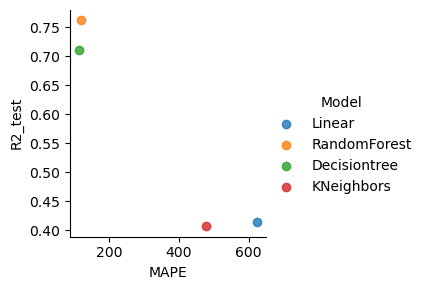

In [137]:
sns.lmplot(
    data=TABLE_2, x="MAPE", y="R2_test",hue='Model', height=3)

## Maximum date of purchase for each name

In [117]:
#  lastest date of purchase
max_purchase_date = df.groupby('full_name')['date_time'].max().sort_values(ascending=False)

# Print the results
max_purchase_date.head(4)

full_name
Charles Perry    2022-12-31 12:59:42
Sheila Walters   2022-12-31 12:59:36
Olivia Wolf      2022-12-31 12:59:29
Kyle Anderson    2022-12-31 12:59:29
Name: date_time, dtype: datetime64[ns]

In [118]:
#  first date of purchase
min_purchase_date = df.groupby('full_name')['date_time'].min().sort_values(ascending=False)

# Print the results
min_purchase_date.head(4)

full_name
Anthony Reynolds    2022-10-23 16:12:28
Bradley Rodriguez   2022-10-03 15:33:51
Karen Mills         2022-07-28 14:05:57
Justin Michael      2022-04-12 15:09:12
Name: date_time, dtype: datetime64[ns]

In [119]:
# Group the data by full_name
avg_month_not_fraud = df.groupby(['full_name', pd.Grouper(key='date_time', freq='M')])['amt'].mean()

In [120]:
# Sort the result by average transaction amount in descending order
nf_avg_month_sorted = avg_month_not_fraud.sort_values(ascending=False)

# Print the highest average monthly amount
nf_highest_average = nf_avg_month_sorted.iloc[0]
print('The highest average monthly amount is: $', round(nf_highest_average, 2))

The highest average monthly amount is: $ 890.74


## Average monthly transaction amount

In [121]:
# Get the name of the customer with the highest average monthly transaction amount
nf_highest_average_customer = nf_avg_month_sorted.index[0]

# Print the name of the customer with the highest average monthly transaction amount
print('The customer with the highest average monthly transaction amount is:', nf_highest_average_customer)

The customer with the highest average monthly transaction amount is: ('Steven Hall', Timestamp('2019-02-28 00:00:00', freq='M'))


In [122]:
Jennifer_Mcdonald = df[df['full_name'] == 'Jennifer Mcdonald']
# Create a line chart to visualize the transaction amounts over time for Jennifer_Mcdonald
fig = px.scatter(Jennifer_Mcdonald, x='date_time', y='amt',color_discrete_sequence=['#F7E1AE'], template='plotly_white')

# Calculate the average transaction amount
avg_amount = Jennifer_Mcdonald['amt'].mean()

# Add a horizontal line to the plot for the average transaction amount
fig.add_shape(type='line', x0=Jennifer_Mcdonald['date_time'].min(), x1=Jennifer_Mcdonald['date_time'].max(),
              y0=avg_amount, y1=avg_amount, line=dict(color='black', dash='dash'))

# Add text annotation for the average transaction amount
fig.add_annotation(x=Jennifer_Mcdonald['date_time'].max(), y=avg_amount, text=f'Avg: ${avg_amount:.2f}',
                   showarrow=False, font=dict(color='black'))

# Show the plot
fig.show()

In [123]:
df_monthly.to_csv('df_monthly.csv', index=False)

## Reference
**For merge files**

Joshua, S. (2022, April 25). How to combine multiple CSV files using Python for your analysis. Medium. https://medium.com/@stella96joshua/how-to-combine-multiple-csv-files-using-python-for-your-analysis-a88017c6ff9e

Opallage, M. (2020, September 8). Answer to ‘python pandas error tokenizing data’. Stack Overflow. https://stackoverflow.com/a/63797557

**For age column and date time**

Khan, A. (2022, November 18). Answer to ‘scikit-learn linear regression using datetime values and forecasting’. Stack Overflow. https://stackoverflow.com/a/74488306

Convert birth date to age in Pandas. (2021, February 1). GeeksforGeeks. https://www.geeksforgeeks.org/convert-birth-date-to-age-in-pandas/

**For visualization**

Color palettes for designers and artists—Color hunt. (n.d.). Retrieved 12 May 2023, from https://colorhunt.co/

**For predict the next month transactions**

Nguyen, L. (2022, June 18). Predict next month transaction with linear regression(Part 1). Medium. https://medium.com/@ndleah/predict-next-month-transaction-with-linear-regression-part-1-917a79b6ae0c

**For outlier**

https://www.kaggle.com/code/rpsuraj/outlier-detection-techniques-simplified